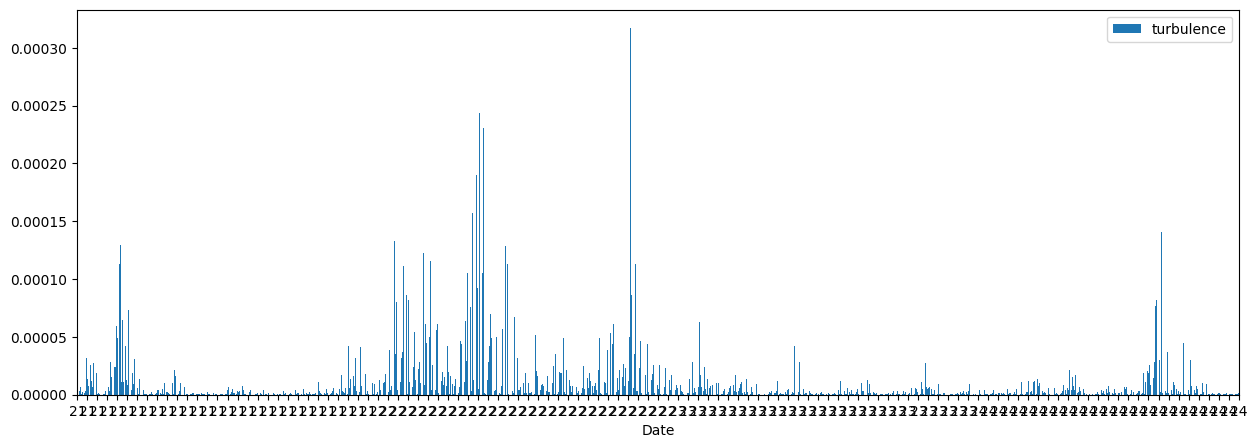

In [3]:
import pandas as pd
import os
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
list_ = ['DVA', 'BPMC', 'PHM', 'PCAR', 'BMO','MRK', 'CHRW', 'MPC', 'AMZN', 'HES']
list_ = ['AAPL', 'ADBE', 'BKR', 'MU', 'NFLX', 'NVDA', 'NXPI', 'ODFL', 'ON', 'ORLY']
data = yf.download(list_, start='2021-01-01', rounding=2, ignore_tz=True, progress=False)['Close']
def plot_turbulences(data, resample='D'):
    pct = data.pct_change(fill_method=None)
    pct = pct.resample(resample).sum()
    pct.index = pct.index.strftime("%y")
    init = 12
    dates = pct.index[init:] 
    turbulences = [0.0] * len(dates)
    for i in range(len(dates)):
        mean = np.array(pct.mean())
        cov = np.array(pct.iloc[i:init+i].cov())
        pct_current = np.array(pct.iloc[init+i])
        
        turbulence = (pct_current - mean) @ cov @ (pct_current - mean).T
        turbulences[i] = turbulence
    df_test = pd.DataFrame(turbulences, index=dates, columns=["turbulence"])
    df_test.dropna(inplace=True)
    
    # 6 main indices
    fig,ax = plt.subplots(figsize=(15,5))
    df_test.plot(kind='bar',ax=ax,stacked=False, width=1)
    plt.xticks(rotation=0) 
    ticks = plt.gca().get_xticks()
    plt.gca().set_xticks(ticks[ticks.astype(int) % 12 == 0])
    plt.show()
    return df_test
df_test = plot_turbulences(data)

<Axes: xlabel='Date'>

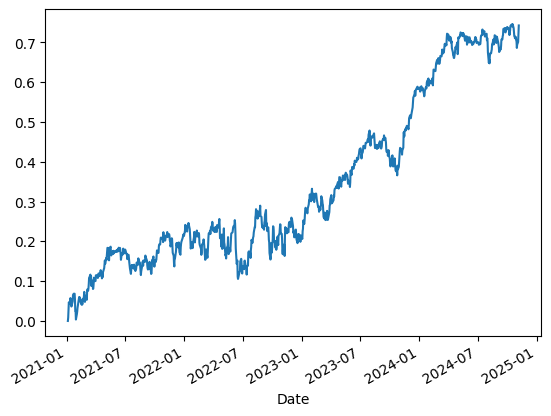

In [16]:
(data.pct_change().cumsum()*0.1).sum(axis=1).plot()

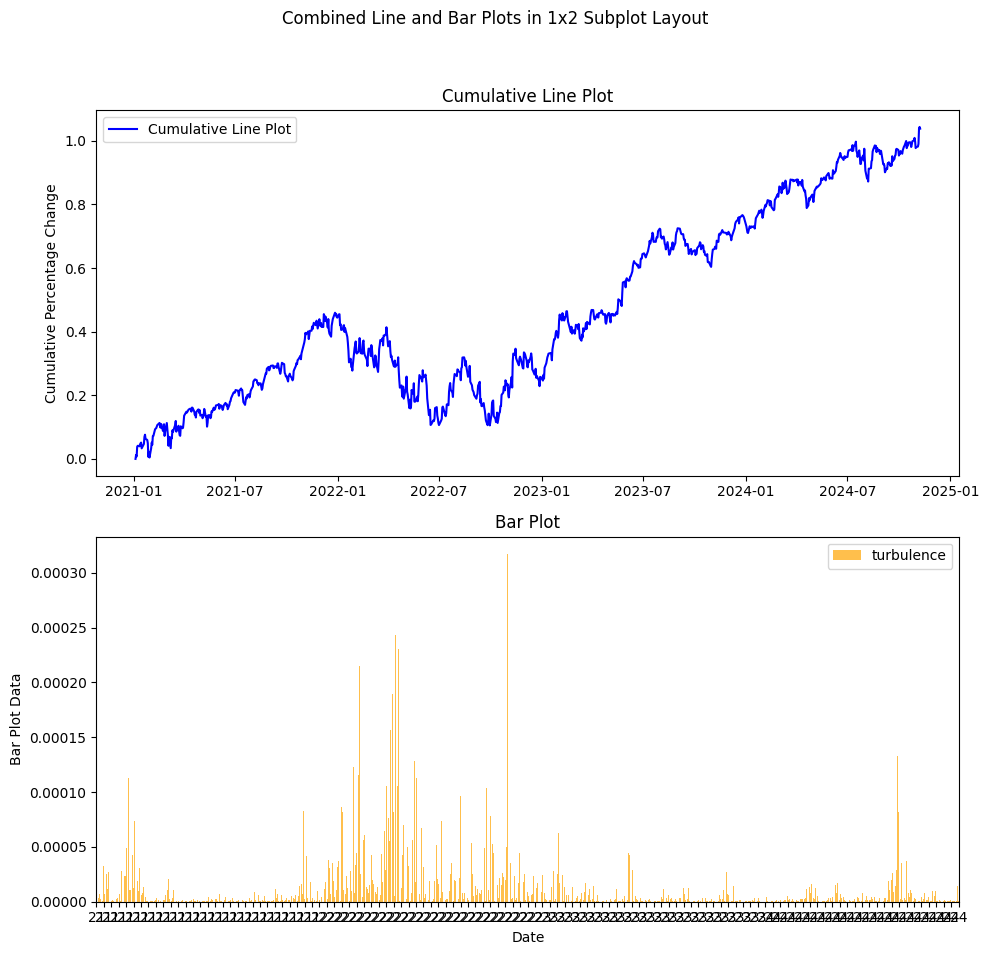

In [4]:
line_data = (data.pct_change().cumsum() * 0.1).sum(axis=1)*0.98

# Set up a 1x2 subplot layout
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot the cumulative line plot in the first subplot
ax1.plot(line_data, color="blue", label="Cumulative Line Plot")
ax1.set_ylabel("Cumulative Percentage Change")
ax1.set_title("Cumulative Line Plot")
ax1.legend(loc="upper left")

# Plot the bar chart in the second subplot
df_test.plot(kind='bar', ax=ax2, color="orange", width=1, position=0, alpha=0.7)
ax2.set_ylabel("Bar Plot Data")
ax2.set_title("Bar Plot")

# Adjust x-ticks to show every 12th tick for clarity in the bar plot
ax2.set_xticks(ax2.get_xticks()[::12])
plt.setp(ax2.get_xticklabels(), rotation=0)

# Display the combined figure
fig.suptitle("Combined Line and Bar Plots in 1x2 Subplot Layout")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit titles
plt.show()